<div style="line-height:0.45">
<h1 style="color:#26BBEE  "> SVM regressor 2  </h1>
</div>
<div style="line-height:0.5">
<h4> Support Vector Machines for regression
</h4>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> Create random points to learn + GridSearchCV for hyperparameters 
</span>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
""" Function that takes a 2D numpy array as input and applies a specific non-linear computation to each row of the array. 
It return a 1D array containing the results of the computation for each row.
"""

def nonlinear(array):
    return (8*array[:,0] - np.exp(0.04 * array[:,1] + np.log(1 + array[:,2]**2)))/(array[:,3]**2 + 5)

#### => Dataset generation

In [3]:
n_samples = 200
n_features = 4

# Create a 2d array with values to the range [0, 5)
x = 5 * np.random.rand(n_samples, n_features)
# Create targets 
y = nonlinear(x) + np.random.randn(n_samples)
y=y.reshape(n_samples,1)

print(x[:2])

[[3.84028583 1.8184036  0.62630148 4.68061723]
 [1.57259456 2.00196011 2.28081728 3.65660134]]


In [4]:
df = pd.DataFrame(data=np.hstack((x,y)), columns=['F1','F2','F3','F4','y'])
df.head()

,F1,F2,F3,F4,y
0,3.840286,1.818404,0.626301,4.680617,3.205323
1,1.572595,2.001960,2.280817,3.656601,0.712741
2,1.092461,2.411337,0.243961,0.300131,1.806177
3,0.510386,0.996674,0.981450,3.610051,1.262545
4,3.667633,3.877200,2.877335,2.703362,-0.142404


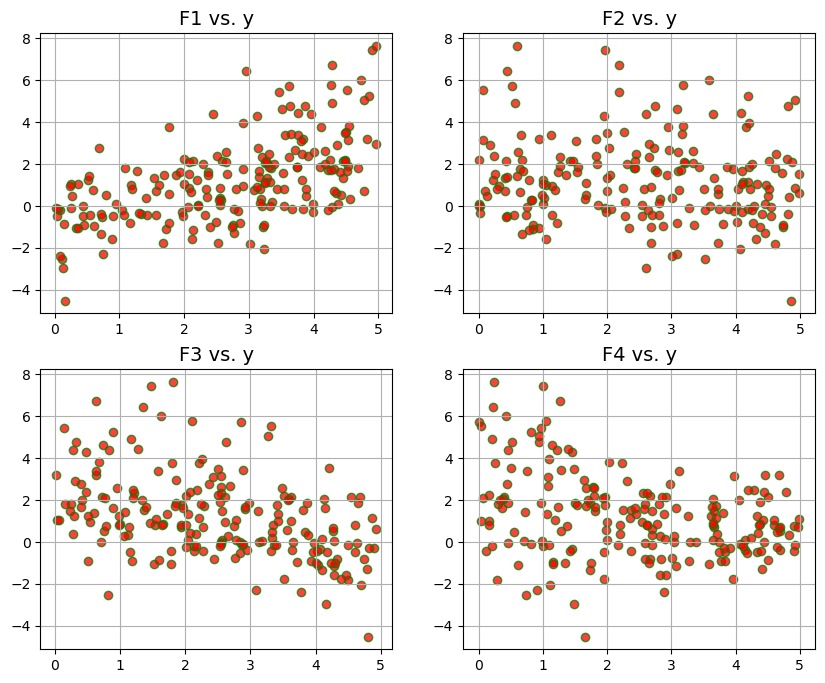

In [5]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(df[df.columns[i]], df['y'], edgecolor='green', color='red', alpha=0.75)
    ax[i].set_title(f"{df.columns[i]} vs. y", fontsize=14)
    ax[i].grid(True)
plt.show()

In [6]:
X = df[['F1','F2','F3','F4']]
y = df['y']

len(X), len(y)

(200, 200)

In [7]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### => SVR with linear kernel

In [8]:
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train);

In [9]:
# Base model
linear = LinearRegression()
# Train 
linear.fit(X_train,y_train)

# Evaluate the quality of the fitted regression model
# Score => Return the coefficient of determination R^2 of the prediction. => (1 - u / v)
# where :
    # u is the residual sum of squares ((y_true - y_pred)** 2).sum()
    # v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().

print("score is:")
linear.score(X_test, y_test)

score is:


0.5665368230729741

### => SVR with Gaussian (radial basis function) kernel

In [10]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train);

In [11]:
# How well the predicted values from the regression model match the actual values => The R^2 score
svr_rbf.score(X_test,y_test)

0.5871092535495002

<div style="line-height:0.45">
<h3 style="color:#26BBEE  "> Recap simple Mean Square Error: </h3>
</div>

$ MSE = (\frac{1}{n}) * Σ(y_i - ŷ_i)^2 $

Where:      
_ n is the number of data points (samples).    
_ yᵢ represents the actual target value for the i-th data point.    
_ ŷᵢ represents the predicted value for the i-th data point.    

In [12]:
## Mean squared error regression loss.
rmse_linear = np.sqrt(mean_squared_error(y_test,svr_linear.predict(X_test)))
rmse_kernelized = np.sqrt(mean_squared_error(y_test,svr_rbf.predict(X_test)))
print(f"RMSE for linear SVR: {rmse_linear}")
print(f"RMSE for RBF kernelized SVR: {rmse_kernelized}")

RMSE for linear SVR: 1.2711912107305876
RMSE for RBF kernelized SVR: 1.234667794331581


<div style="line-height:0.45">
<h2 style="color:#26BBEE  "> Search for best hyperparameters </h2>
</div>

Most important arguments for SVR:

+ kernel: A kernel functions.
+ degree: Polynomial degree for the 'poly' kernel.
+ gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels.
+ coef0: Independent term in kernel function for 'poly' and 'sigmoid' kernels.
+ shrinking: Use or not shrinking heuristic. This can affect speed.
+ C : Regularization parameter. The strength of the regularization is inversely proportional to C. Positive. (l2 penalty).
+ epsilon : specifies the epsilon-tube within which no penalty is associated in the training loss function,        
    with points predicted within a distance epsilon from the actual value. Non-negative.

In [13]:
# Grid Search 
params_grid = {
    'C':[0.01, 0.05, 0.1, 0.5, 1, 2, 5],
    'epsilon':[0.1, 0.2, 0.5, 1]
    }
grid = GridSearchCV(svr_rbf, param_grid=params_grid, cv=5, scoring='r2', verbose=1, return_train_score=True)


In [14]:
%%script echo Skipping, too many hyperparameters together => overtime!
params_grid = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  #for poly
    'gamma': ['scale', 'auto', 0.01, 0.1, 0.5, 1], 
    'coef0': [-1, 0, 1],  #For 'poly' and 'sigmoid' kernels
    'shrinking': [True, False],
}

grid = GridSearchCV(svr_rbf, param_grid=params_grid, cv=5, scoring='r2', verbose=1, return_train_score=True)

Skipping, too many hyperparameters together => overtime!


In [15]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [16]:
grid.best_estimator_

SVR(C=2, epsilon=1)

In [17]:
## Use best estimator
svr_best = SVR(kernel='rbf',gamma='scale', C=2.0, epsilon=1)
svr_best.fit(X_train, y_train)

SVR(C=2.0, epsilon=1)

In [18]:
svr_best.score(X_test,y_test)


0.613498898180795

In [19]:
""" Get the indices of support vectors """
support_indices = svr_best.support_

In [20]:
rmse_best_kerneliz = np.sqrt(mean_squared_error(y_test, svr_best.predict(X_test)))
print(f"RMSE for RBF kernelized SVR: {rmse_best_kerneliz}")

RMSE for RBF kernelized SVR: 1.1945598486926579
